# Corona Detection using lung dataset and building CNN model

Here, I use the Lung dataset to predict if the person has effected to covid or not.

## Importing Libraries:


In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings..
import warnings
warnings.filterwarnings('ignore')

## Load the Lung dataset:

In [4]:
os.getcwd()

'C:\\projects\\corona detection project\\notebooks'

In [65]:
data_dir = 'C:\projects\corona detection project\data'

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/projects/corona detection project/data')

In [66]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg')]

In [103]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

56


In [68]:
covid = list(data_dir.glob('covid/*'))
covid[:5]

[WindowsPath('C:/projects/corona detection project/data/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg')]

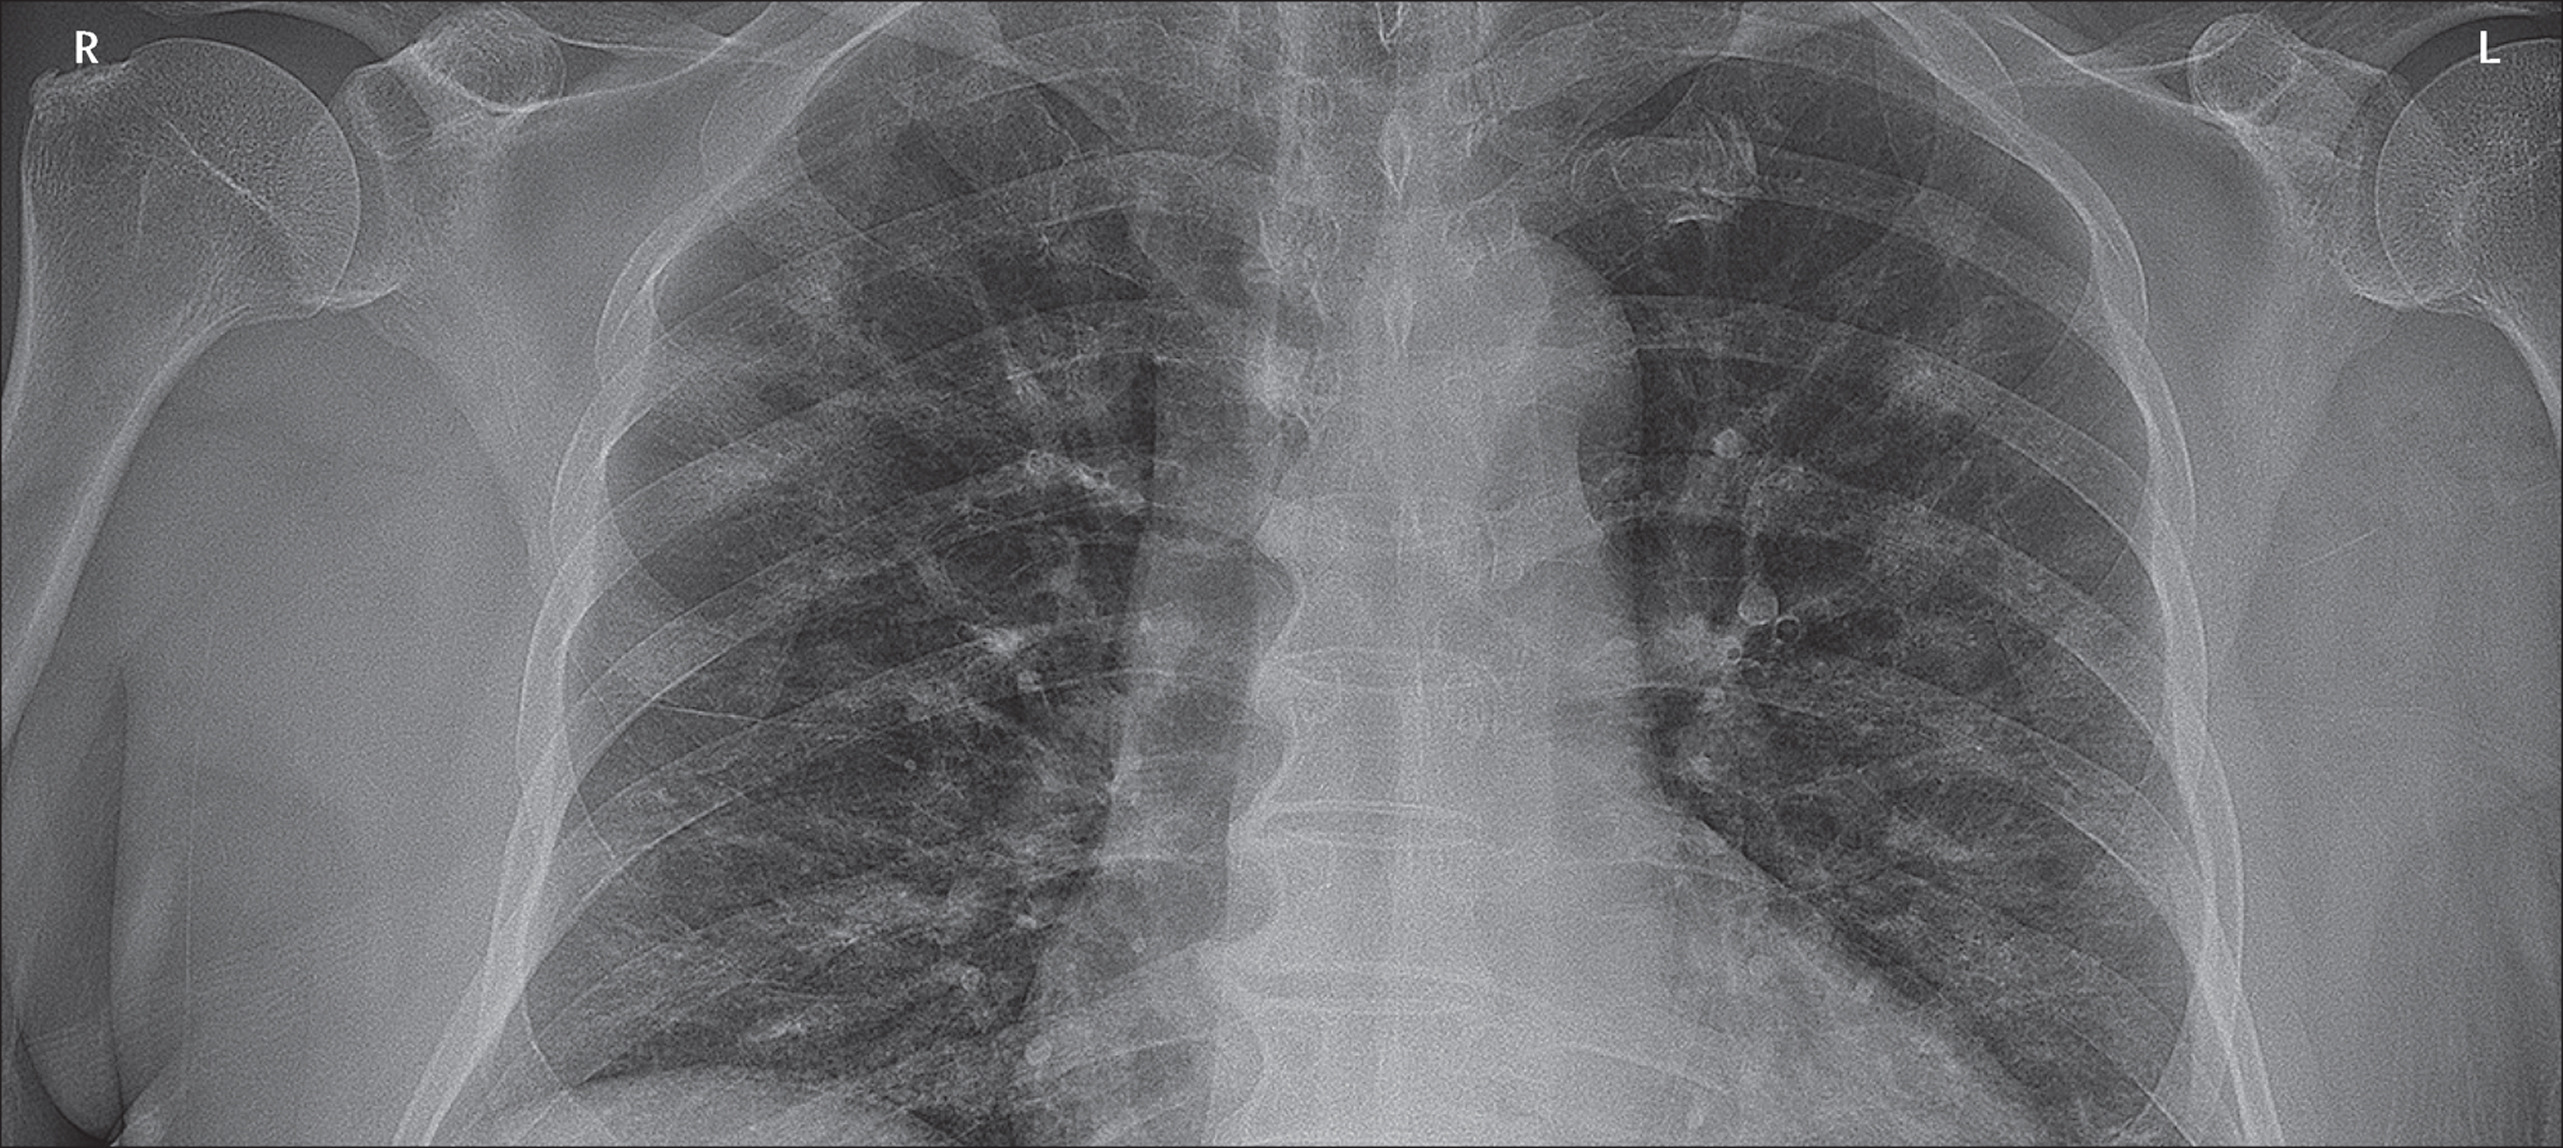

In [70]:
import PIL

PIL.Image.open(str(covid[1]))

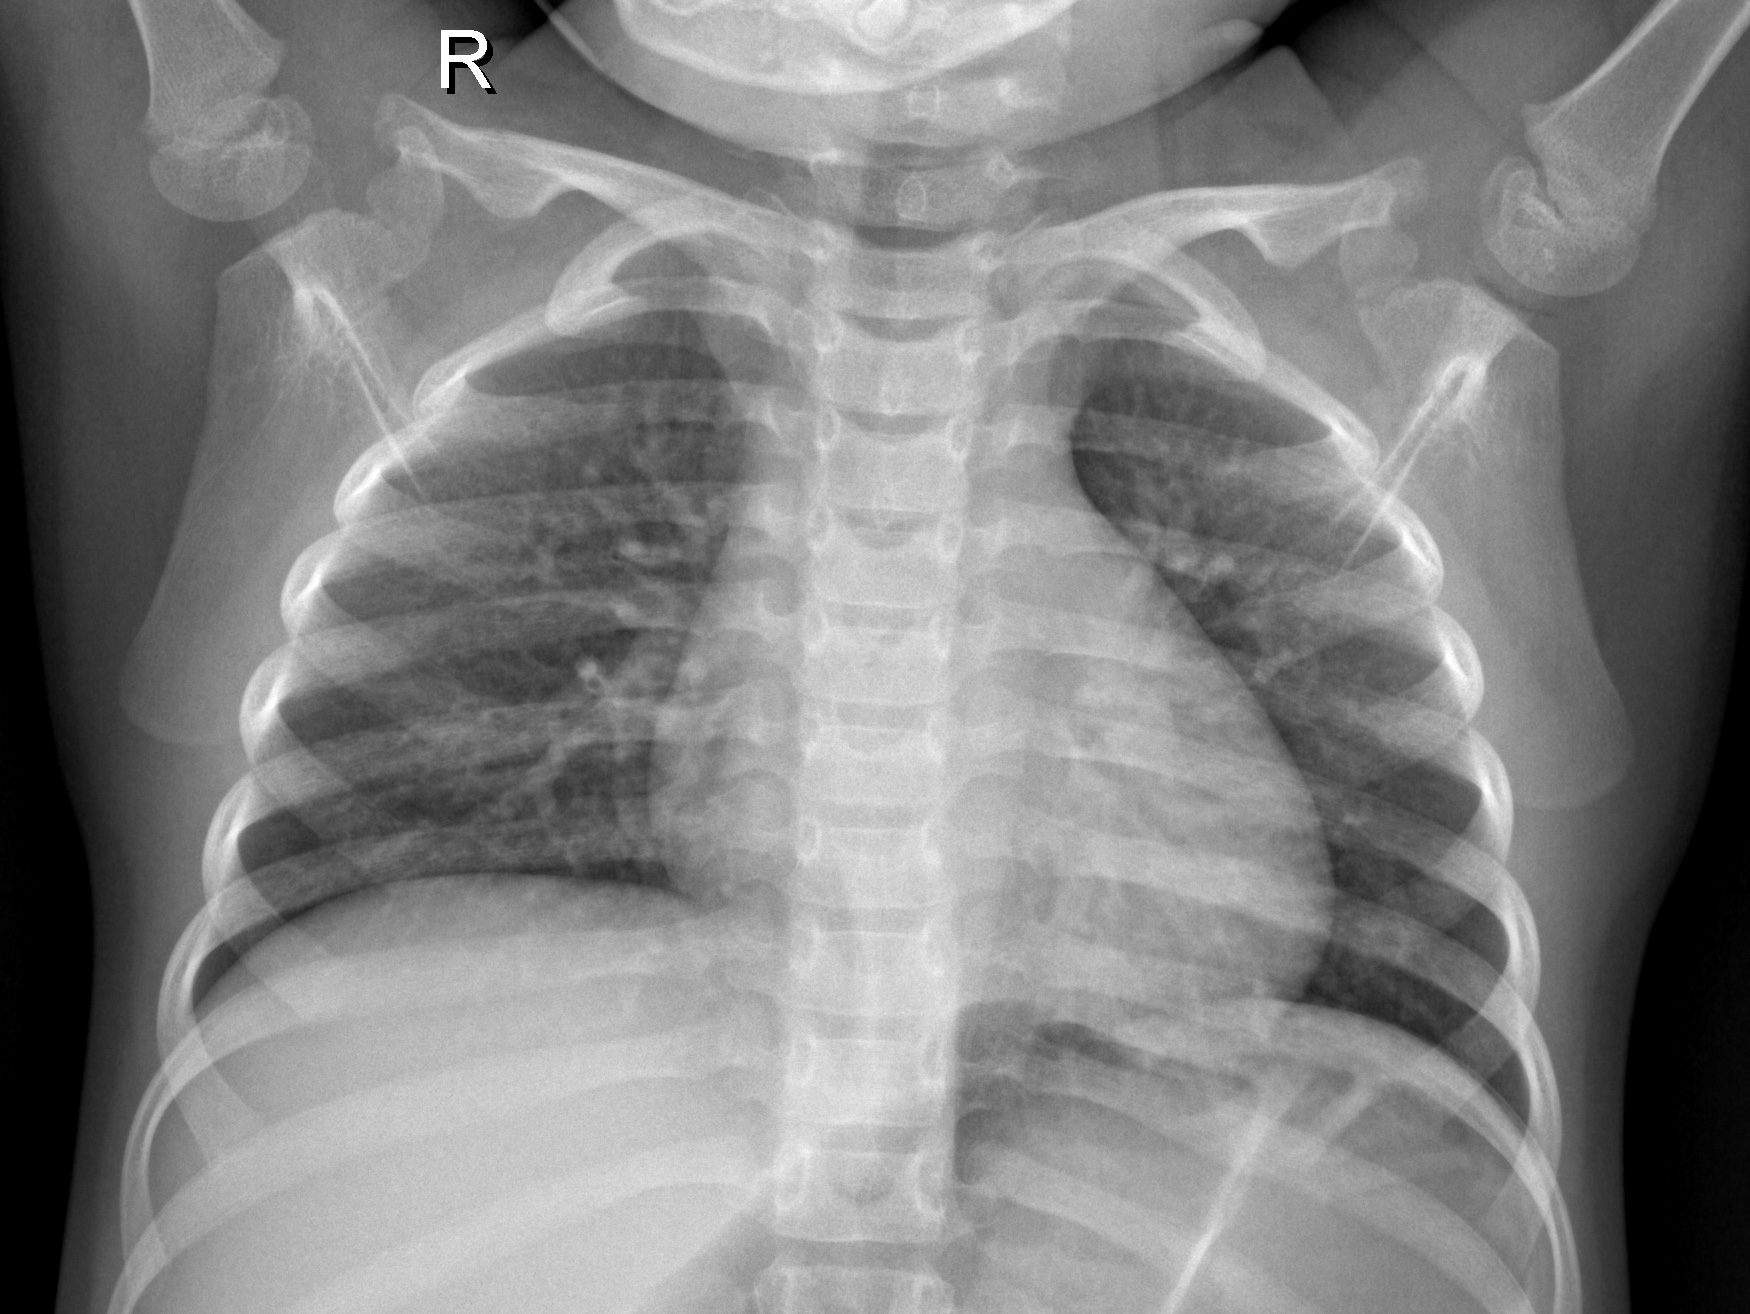

In [71]:
normal = list(data_dir.glob('normal/*'))
PIL.Image.open(str(normal[0]))

## Read Lung images into numpy array using opencv:

In [72]:
lung_images_dict = {
    'covid': list(data_dir.glob('covid/*')),
    'normal': list(data_dir.glob('normal/*'))
}

In [73]:
lung_labels_dict = {
    'covid': 0,
    'normal': 1
}

In [74]:
lung_images_dict['covid'][:5]

[WindowsPath('C:/projects/corona detection project/data/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg'),
 WindowsPath('C:/projects/corona detection project/data/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg')]

In [75]:
str(lung_images_dict['covid'][0])

'C:\\projects\\corona detection project\\data\\covid\\01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'

In [76]:
img = cv2.imread(str(lung_images_dict['covid'][0]))

In [77]:
img.shape

(1482, 1989, 3)

In [78]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [80]:
X, y = [], []

for type, images in lung_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(lung_labels_dict[type])

In [81]:
X = np.array(X)
y = np.array(y)

## Train, Test and Split the data:

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Preprocessing: scale images

In [83]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## Build convolutional neural network and train it:

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [126]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

num_classes = 2

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
train_model = model.fit(X_train_scaled, y_train, epochs=30).history     

Epoch 1/30
8/8 [==============================] - 5s 404ms/step - loss: 0.9147 - accuracy: 0.4690
Epoch 2/30
8/8 [==============================] - 4s 441ms/step - loss: 0.5880 - accuracy: 0.7478
Epoch 3/30
8/8 [==============================] - 4s 438ms/step - loss: 0.4093 - accuracy: 0.8407
Epoch 4/30
8/8 [==============================] - 3s 412ms/step - loss: 0.2557 - accuracy: 0.8982
Epoch 5/30
8/8 [==============================] - 3s 415ms/step - loss: 0.2852 - accuracy: 0.9027
Epoch 6/30
8/8 [==============================] - 4s 442ms/step - loss: 0.1791 - accuracy: 0.9292
Epoch 7/30
8/8 [==============================] - 3s 412ms/step - loss: 0.1772 - accuracy: 0.9425
Epoch 8/30
8/8 [==============================] - 4s 434ms/step - loss: 0.1575 - accuracy: 0.9381
Epoch 9/30
8/8 [==============================] - 3s 406ms/step - loss: 0.1046 - accuracy: 0.9690
Epoch 10/30
8/8 [==============================] - 4s 438ms/step - loss: 0.1045 - accuracy: 0.9602
Epoch 11/30
8/8 [==

## Test the model:

In [96]:
model.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 1s 65ms/step - loss: 0.1510 - accuracy: 0.9342


[0.15103568136692047, 0.9342105388641357]

#### Here, it has the accuracy of 93%

In [97]:
# prediction of model..

predictions = model.predict(X_test_scaled)
predictions

3/3 [==============================] - 0s 56ms/step


array([[-4.767729  ,  4.1401777 ],
       [-2.9721458 ,  2.6104717 ],
       [-3.7443435 ,  3.135976  ],
       [-4.510294  ,  4.0100794 ],
       [-1.1395675 ,  1.3844222 ],
       [-3.277064  ,  2.846288  ],
       [-4.705258  ,  4.027118  ],
       [-2.6531832 ,  2.4528913 ],
       [-4.187945  ,  3.5491195 ],
       [-4.23623   ,  3.6407566 ],
       [ 1.1894305 , -1.827065  ],
       [ 3.7421064 , -4.0154586 ],
       [-4.1668997 ,  3.5073488 ],
       [ 2.4207392 , -3.1981263 ],
       [ 2.3347545 , -2.7687113 ],
       [ 4.6415777 , -5.5262394 ],
       [ 3.5364997 , -4.6701903 ],
       [ 1.8250043 , -3.3940315 ],
       [-3.8066866 ,  3.4216747 ],
       [ 2.3263571 , -3.6358163 ],
       [ 3.6400788 , -4.251227  ],
       [-4.278778  ,  3.7248998 ],
       [-0.56484574,  0.0758922 ],
       [-3.7549615 ,  3.1389625 ],
       [ 3.884579  , -4.4510636 ],
       [-4.2176824 ,  3.8446229 ],
       [-3.3540657 ,  2.764318  ],
       [-4.0916815 ,  3.4652357 ],
       [-4.9678044 ,

In [98]:
score = tf.nn.softmax(predictions[0])

In [99]:
np.argmax(score)

1

In [100]:
y_test[0]

1

### Original Image:

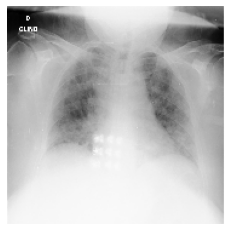

In [101]:
plt.axis('off')
plt.imshow(X[0])

### Newly generated training sample using data augmentation:

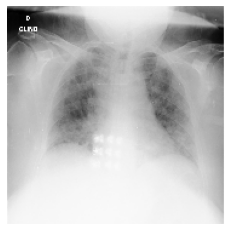

In [102]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

## Plot Accuracy and Loss Graphs

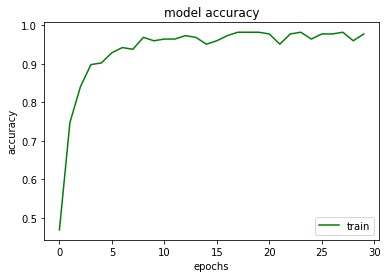

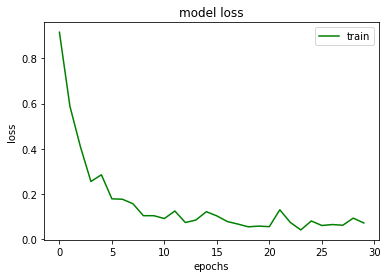

In [136]:
# summarize history for accuracy

plt.plot(train_model['accuracy'],'green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss

plt.title('loss')
plt.plot(train_model['loss'],'green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Save the file:

In [144]:
model.save("C:\\projects\\corona detection project\\model\\covid_prediction.h5")

In [145]:
from keras.models import load_model
test_model = load_model("C:\\projects\\corona detection project\\model\\covid_prediction.h5")
test_model